# Daytime risk of Assault in San Fransisco higher then you would expect? 
## A comparison of crime rates between San Fransicso and Seattle
### Author: Ian Skinner Date: 29th Nov 2015
## Background
This analysis looks at the difference in trends in assault rates for the summer month of June, July and August 2014, and hypothesises that it is likely that we should see that there are significantly higher rate of assault at night time compared to day. 

When examining Seattle data this hypothesis broadly holds, however in San Francisco day time assault rates are much closer to night time rates with only August 2014 showing a drop in the day time rate.

##  Data Sources

The data sources I am using for this are the two sample files provided with the assignment: 
- The Seattle 2014 crime incident report available through data.seattle.gov
- The San Fransisco 2014 crime incident report available through data.sfgov.org

##  Assumptions

The key assumptions I have made are as follows:
- Population of Seattle is 662k (source: Wikipedia)
- Population of San Fransisco is 852k (source: Wikipedia)
- The term 'Assault' encompasses the same set of crimes across both cities in the data sources I am using 
- There is no bias on reported crimes across the two cities or by time of day
- Night time hours are considered to be between the hours of 6pm(18:00) and 6 AM(06:00)
- I have derived a 'per 100K capita per month rate' metric to allow side by side comparison of the two Cities

##  Data Preparation

The following code extracts data from both the Seattle and San Fran datasets for the incidents of Assault. Feature engineering is undertaken to create both a date/month indicator and a time of day indicator.


In [1]:
setwd("C:/Users/Ian/Desktop/Coursera/DataViz/Assignment1")
warning = FALSE
options(jupyter.plot_mimetypes = 'image/png')

library(ggplot2)
library(data.table)
library(lubridate)
library(scales)

sanfranraw <-data.table(read.csv("sanfrancisco_incidents_summer_2014.csv",stringsAsFactors=FALSE))
seattleraw <-data.table(read.csv("seattle_incidents_summer_2014.csv",stringsAsFactors=FALSE))
sanfranraw <- sanfranraw[sanfranraw$Category=="ASSAULT",]
seattleraw <- seattleraw[seattleraw$Summarized.Offense.Description=="ASSAULT",]

sanfranraw$City<-"San Fran"
seattleraw$City<-"Seattle"

sanfranraw$OffenseDate<-as.Date(sanfranraw$Date, "%m/%d/%Y")
seattleraw$OffenseDate<-as.Date(seattleraw$Occurred.Date.or.Date.Range.Start, "%m/%d/%Y")
sanfranraw$OffenseHour <-hour(strptime(sanfranraw$Time, "%H:%M"))
seattleraw$OffenseHour <- hour(parse_date_time(seattleraw$Occurred.Date.or.Date.Range.Start, "%m/%d/%Y %I:%M:%S %p"))

sanfran<-sanfranraw[,c("City","OffenseDate","OffenseHour"), with=FALSE]
seattle<-seattleraw[,c("City","OffenseDate","OffenseHour"), with=FALSE]

finaldata <- rbind(sanfran,seattle)

finaldata$TimeOfDay="Day"
finaldata$TimeOfDay[finaldata$OffenseHour>=18] <-"Night"
finaldata$TimeOfDay[finaldata$OffenseHour<6] <-"Night"


finaldata$OffenseMonth <- as.Date(cut(finaldata$OffenseDate, breaks="month") )


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, mday, month, quarter, wday, week, yday, year



##  Exploratory Data Analysis

Initially I took a look at the overall crime rate per city per 100K capita per month.

Key Insights:
- San Francisco has a larger assault rate per capita per month than Seattle
- San Francisco's peak month of assault was July (117.4) whereas Seattle peaked in August (105.4)

### Bar chart of overall assault crime rate per 100k capita per city per month  

ymax not defined: adjusting position using y instead


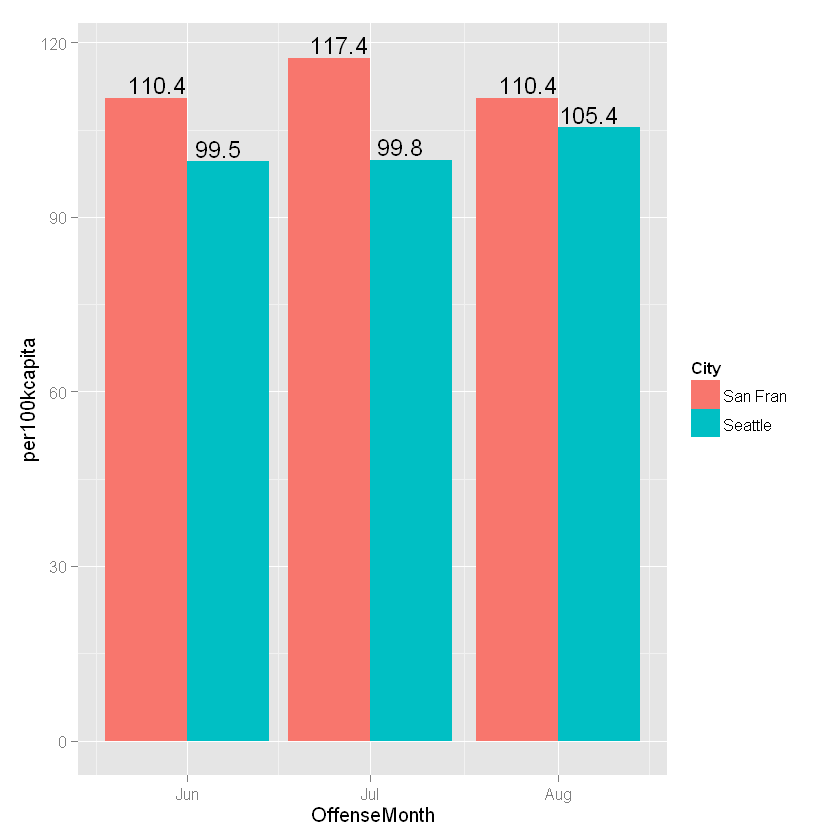

In [2]:
finaldatasum <- finaldata[, .N,by = list(OffenseMonth,City)]
finaldatasum$per100kcapita<-0
finaldatasum$per100kcapita[finaldatasum$City=="Seattle"]<-finaldatasum[finaldatasum$City=="Seattle",N]/6.62
finaldatasum$per100kcapita[finaldatasum$City=="San Fran"]<-finaldatasum[finaldatasum$City=="San Fran",N]/8.52


fig1 <-ggplot(finaldatasum, aes(OffenseMonth,y=per100kcapita, fill=City,order=City))+
  geom_bar(stat="identity", position= "dodge")+
  geom_text(aes(label=round(per100kcapita,1)), position=position_dodge(width=20), vjust=-0.25)+ 
  scale_x_date(breaks = date_breaks("months"),labels = date_format("%b"))

print(fig1)

I then took a look at the overall crime rate per city per 100K capita per month but viewed this on a night/day split.

Key Insights:
- The Assault rate is considerably lower for Seattle during the day than San Fransisco
- Night time Assault rate between the 2 cities is very similar with a difference of only 1.1 in the rate

### Bar chart of overall assault crime rate per 100k capita per city by time of day

ymax not defined: adjusting position using y instead


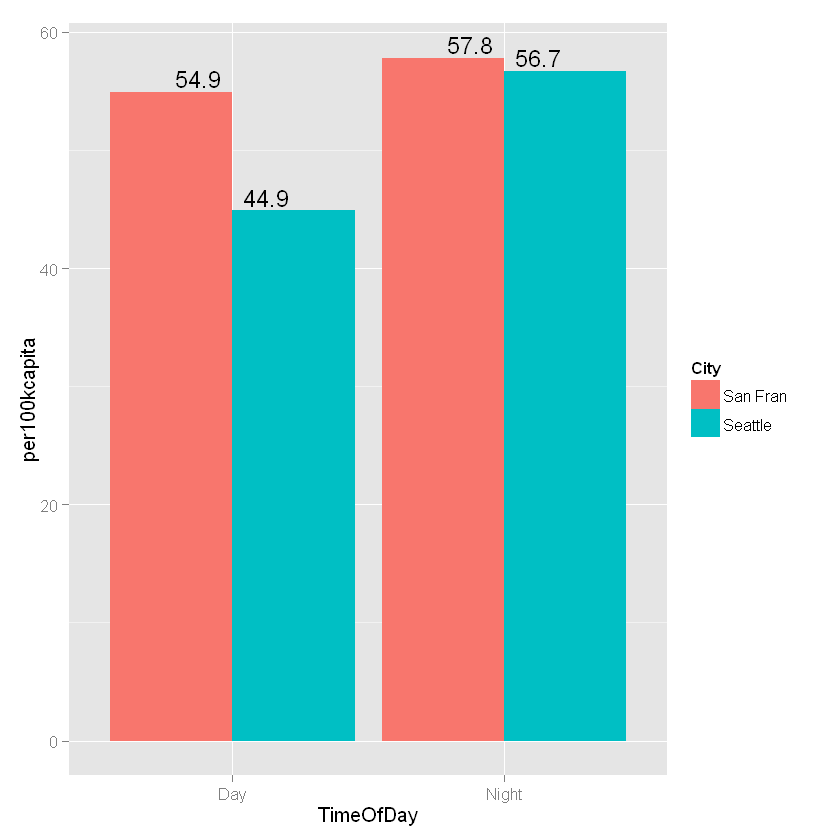

In [3]:

finaldatasum2 <- finaldata[, .N,by = list(TimeOfDay,City)]
finaldatasum2$per100kcapita<-0
finaldatasum2$per100kcapita[finaldatasum2$City=="Seattle"]<-finaldatasum2[finaldatasum2$City=="Seattle",N]/(6.62*3)
finaldatasum2$per100kcapita[finaldatasum2$City=="San Fran"]<-finaldatasum2[finaldatasum2$City=="San Fran",N]/(8.52*3)

fig2 <- ggplot(finaldatasum2, aes(TimeOfDay,y=per100kcapita, fill=City,order=City))+
  geom_bar(stat="identity", position= "dodge")+
  geom_text(aes(label=round(per100kcapita,1)), position=position_dodge(width=0.5), vjust=-0.25)

print(fig2)

##  Results

Finally I bought together the two previous charts to get a visual understanding of the data

Key Insights:
- It can clearly be seen that the San Fransico day time Assault rate is very similar in June and July to the night time rate, however in the month of August this drops off a fair proportion
- Comparitively we see a large differential in Seattle between day time and night time results, which meets more with the general expectation that violent crime is more prevalent at night

### Line chart of overall assault crime rate per 100k capita per city per month  and Time of Day

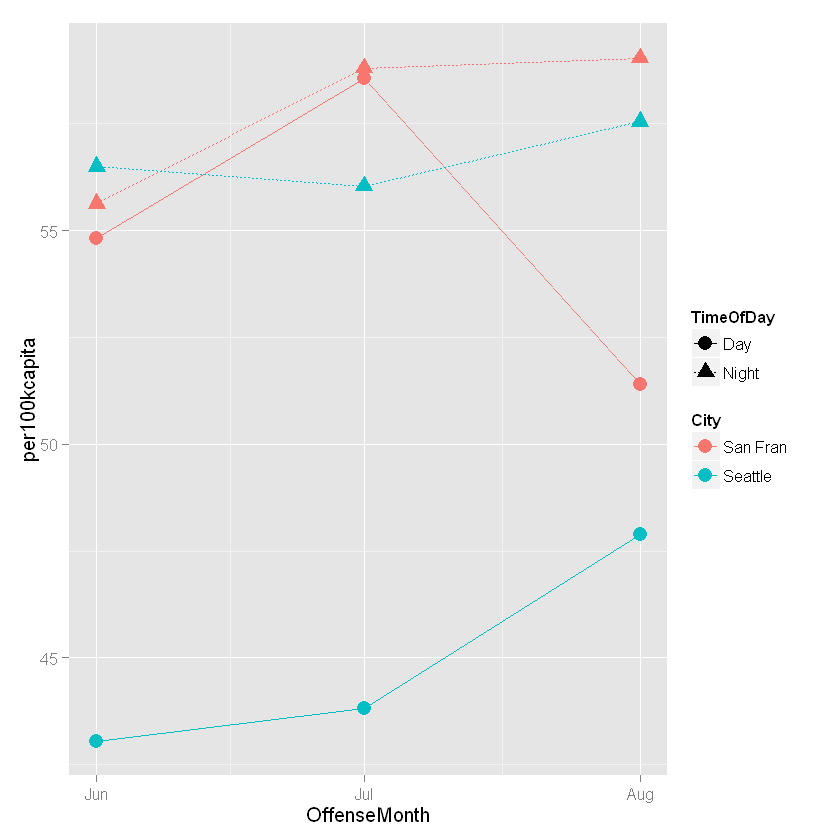

In [4]:
finaldatasum3 <- finaldata[, .N,by = list(OffenseMonth,City,TimeOfDay)]
finaldatasum3$per100kcapita<-0
finaldatasum3$per100kcapita[finaldatasum3$City=="Seattle"]<-finaldatasum3[finaldatasum3$City=="Seattle",N]/6.62
finaldatasum3$per100kcapita[finaldatasum3$City=="San Fran"]<-finaldatasum3[finaldatasum3$City=="San Fran",N]/8.52

fig3 <- ggplot(finaldatasum3, aes(OffenseMonth,y=per100kcapita, color=City,shape=TimeOfDay))+
  geom_line(aes(linetype=TimeOfDay))+
  geom_point(size = 4)+ 
  scale_x_date(breaks = date_breaks("months"),labels = date_format("%b"))

print(fig3)

## Conclusion

The expectation was that the San Fransisco night time assault crime rate would display a similar trend to that of Seattle, as a fair perception is that in general night time violent crime rates are higher than day time rates.

We can see that for at least June and July, and on average, the day time Assault rate is somewhat higher than would be expected in San Fransisco. 

### Next Steps

Further study on a longer time period of results and year on year analysis may indicate that the San Fransico rate in August may be an outlier.  